In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 4571 files belonging to 4 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1141 files belonging to 4 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\sangh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [12]:
cnn.compile(optimizer=Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,496,688 (28.60 MB)

 Trainable params: 7,496,688 (28.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.4739 - loss: 1.2315 - val_accuracy: 0.7870 - val_loss: 0.5536
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.7616 - loss: 0.6153 - val_accuracy: 0.8046 - val_loss: 0.4786
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8250 - loss: 0.4555 - val_accuracy: 0.8589 - val_loss: 0.3429
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8825 - loss: 0.3328 - val_accuracy: 0.9010 - val_loss: 0.2573
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9204 - loss: 0.2295 - val_accuracy: 0.8729 - val_loss: 0.3248
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9406 - loss: 0.1736 - val_accuracy: 0.9255 - val_loss: 0.2140
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9564 - loss: 0.1241 - val_accuracy: 0.9185 - val_loss: 0.2770
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9676 - loss: 0.1039 - val_accu

In [15]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 71s 497ms/step - accuracy: 0.9897 - loss: 0.0332
Training accuracy: 0.9916867017745972


In [16]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 516ms/step - accuracy: 0.9378 - loss: 0.1937
Validation accuracy: 0.9421560168266296


In [17]:
cnn.save('Brain_Tumor_model.keras')

In [18]:
training_history.history

{'accuracy': [0.5933056473731995,
  0.7816670536994934,
  0.8459855318069458,
  0.9004594087600708,
  0.9269306659698486,
  0.9492452144622803,
  0.9617151618003845,
  0.9726536870002747,
  0.9774666428565979,
  0.9899365305900574],
 'loss': [0.9409046173095703,
  0.5577347874641418,
  0.4046172499656677,
  0.28885722160339355,
  0.20647504925727844,
  0.15090622007846832,
  0.10584063082933426,
  0.08545298129320145,
  0.06772064417600632,
  0.03305600956082344],
 'val_accuracy': [0.7870289087295532,
  0.8045573830604553,
  0.8588957190513611,
  0.900964081287384,
  0.8729184865951538,
  0.9255039691925049,
  0.9184925556182861,
  0.9368974566459656,
  0.9368974566459656,
  0.9421560168266296],
 'val_loss': [0.5535960793495178,
  0.4786297678947449,
  0.3428504168987274,
  0.25730979442596436,
  0.32480305433273315,
  0.21396799385547638,
  0.27703389525413513,
  0.20605994760990143,
  0.1867966204881668,
  0.2039787769317627]}

In [19]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


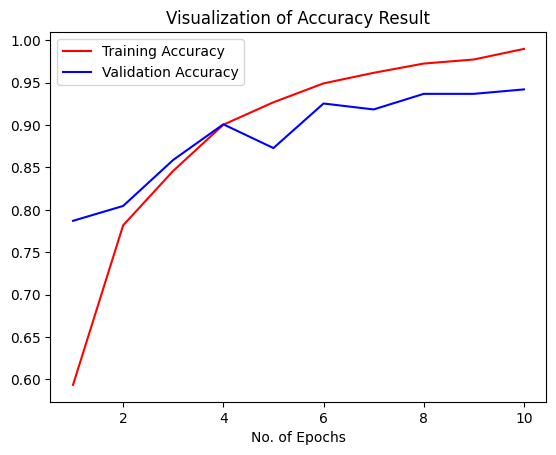

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [22]:
class_name = validation_set.class_names

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1141 files belonging to 4 classes.


In [25]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1141/1141 ━━━━━━━━━━━━━━━━━━━━ 45s 39ms/step


In [26]:
true_categories = []
for images, labels in test_set:
    true_categories.append(labels)

true_categories = np.concatenate(true_categories, axis=0)

In [27]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(1141,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [28]:
predicted_categories

<tf.Tensor: shape=(1141,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [29]:
cm = confusion_matrix(Y_true,predicted_categories)
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      Glioma       0.91      0.92      0.92       264
  Meningioma       0.90      0.88      0.89       267
      Normal       0.99      0.97      0.98       319
   Pituitary       0.96      0.99      0.97       291

    accuracy                           0.94      1141
   macro avg       0.94      0.94      0.94      1141
weighted avg       0.94      0.94      0.94      1141



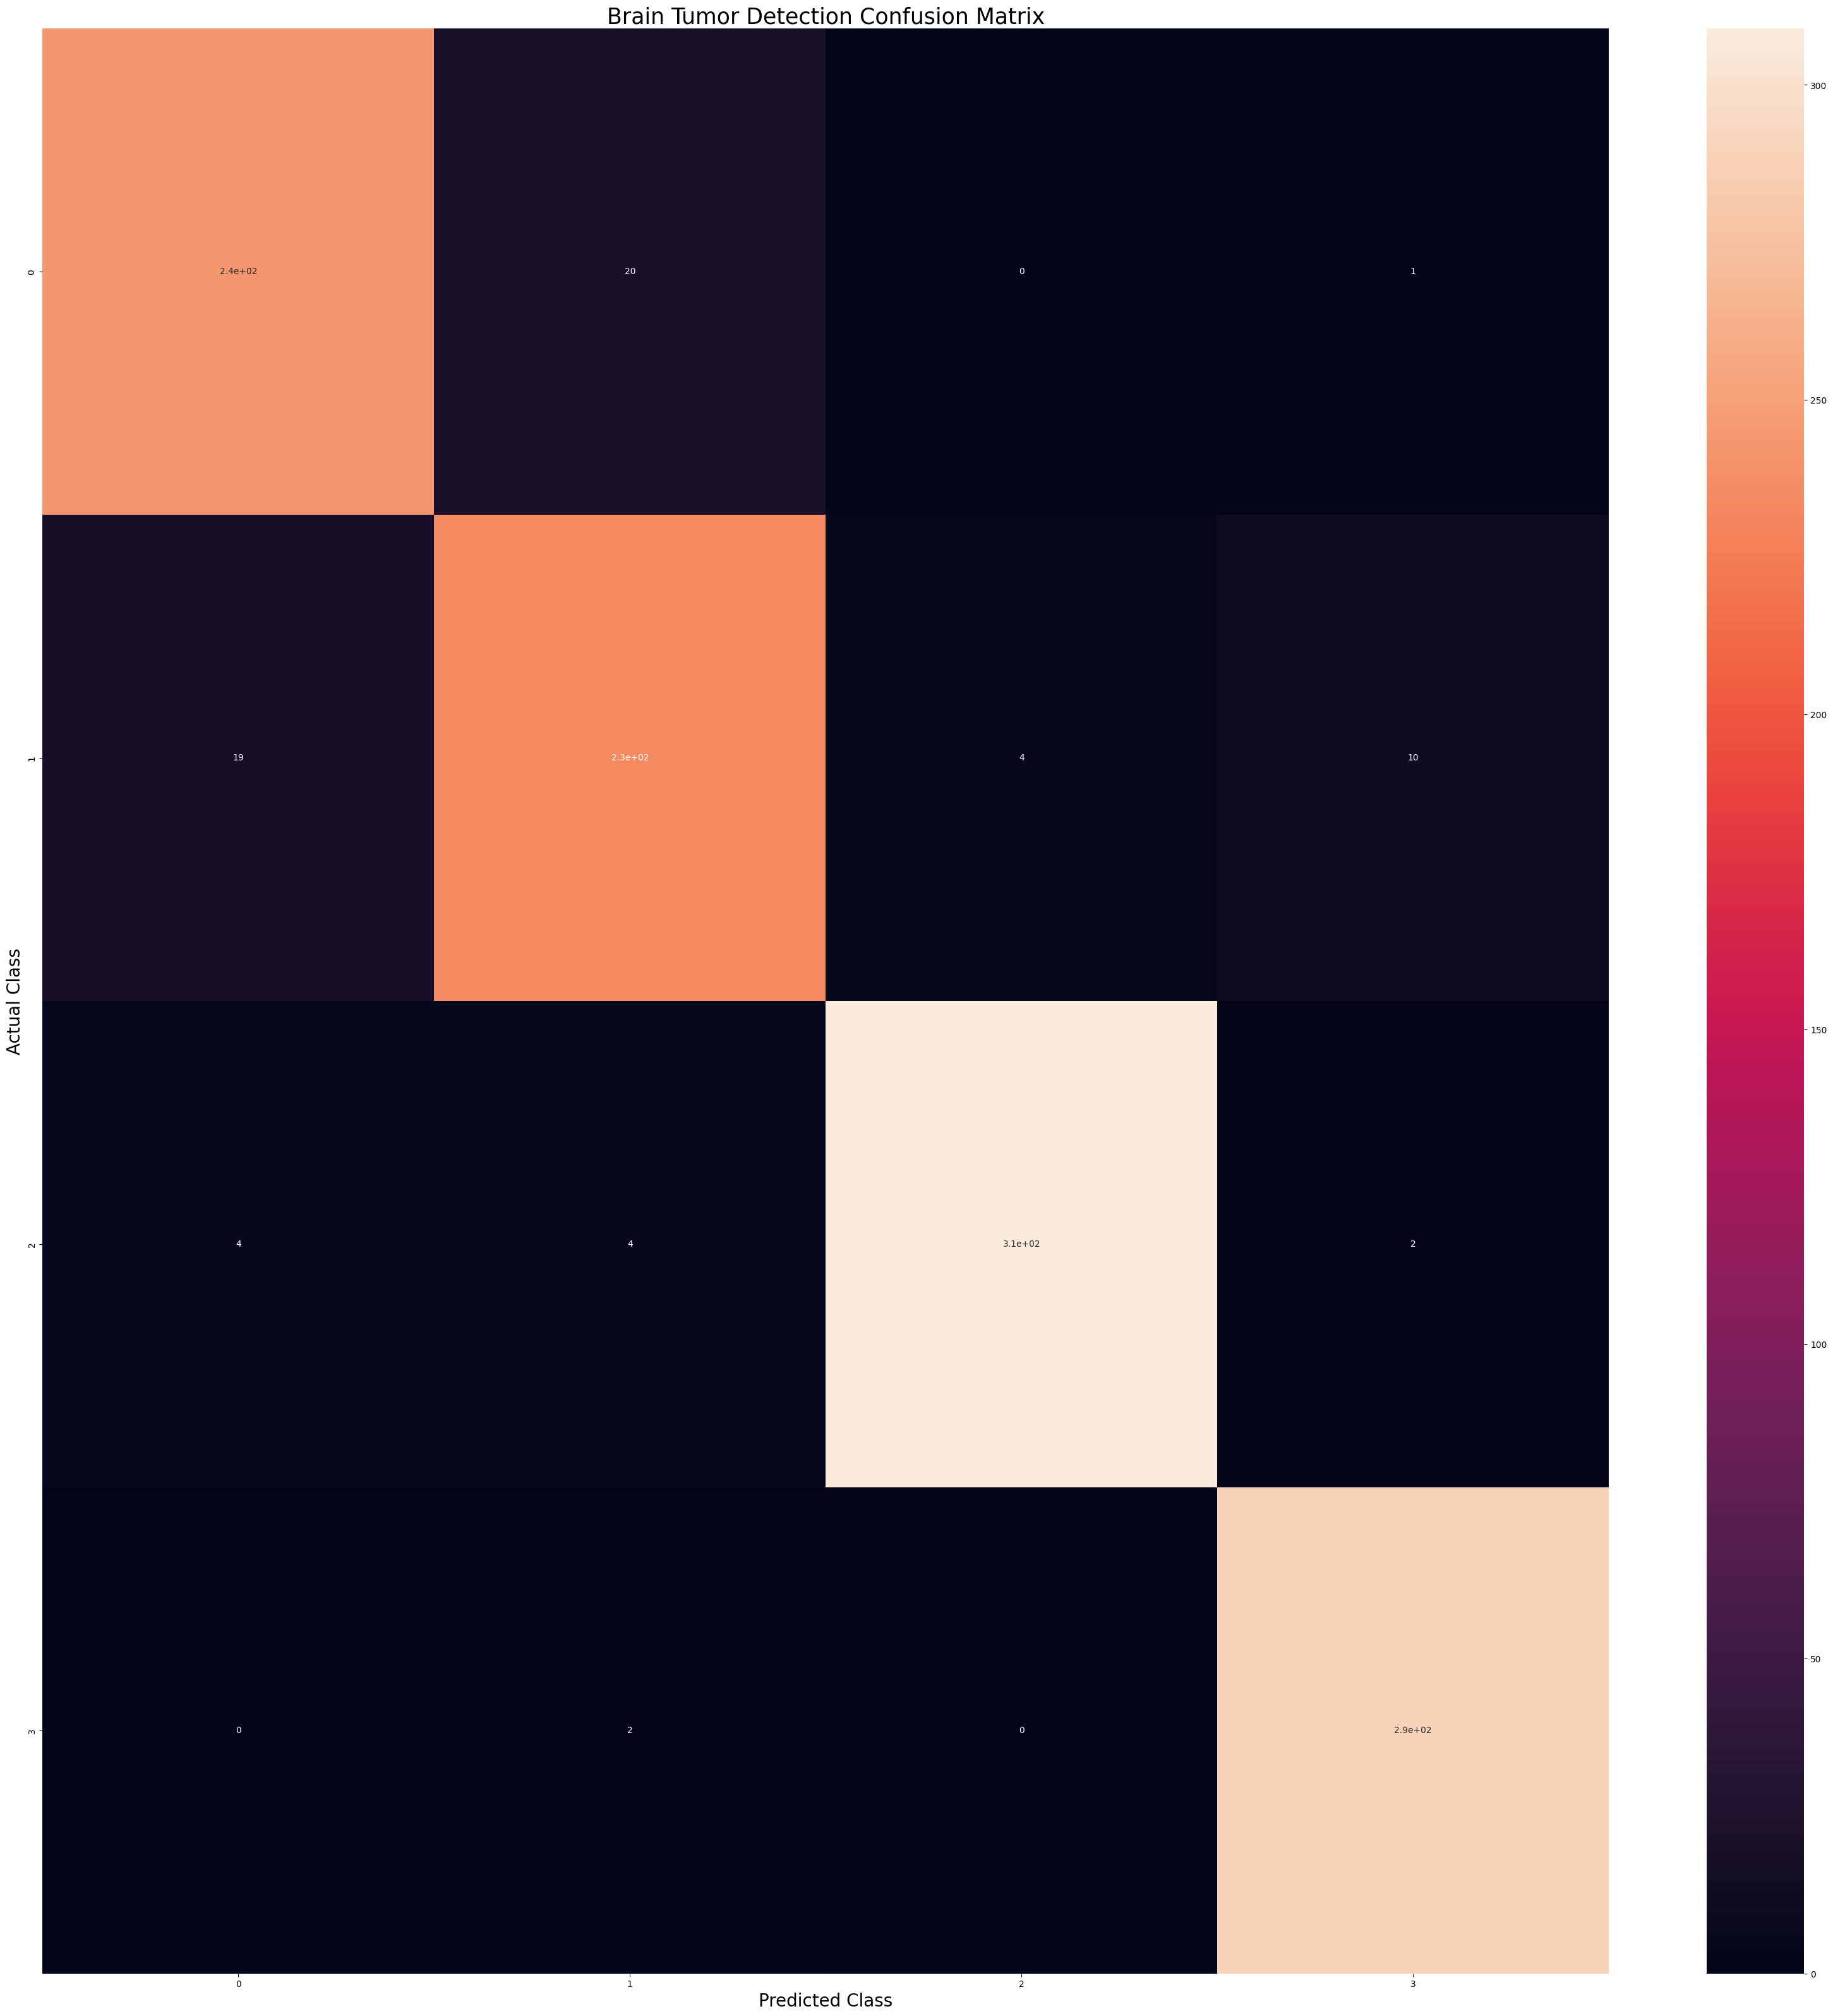

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Brain Tumor Detection Confusion Matrix',fontsize = 25)
plt.show()